# Re-fitting literature scaling relations for comparisons

This notebook is used as a place to re-fit samples of masses and other observables taken from literature, with the aim of comparing the re-fitted data to the new results presented in the paper. Re-fitting with the same method makes the comparisons slightly more consistent.

We use the LIRA R fitting package, through an interface built into XGA.

## Import statements

In [1]:
import pandas as pd
import numpy as np
from astropy.units import Quantity, UnitConversionError
import matplotlib.pyplot as plt
from typing import Union, List
from shutil import rmtree
import os
import pickle

# This adds the directory above to the path, allowing me to import the common functions that I've written in
#  common.py - this just saves me repeating boring code and makes sure its all consistent
import sys
sys.path.insert(0, '..')
from common import xcs_cosmo

import xga
# This is a bodge that will only work because xga_output in notebooks has already been defined, XGA
#  will be made to handle this more gracefully at some point
temp_dir = xga.OUTPUT
actual_dir = temp_dir.split('notebooks/')[0]+'notebooks/xga_output/'
xga.OUTPUT = actual_dir
xga.utils.OUTPUT = actual_dir
# As currently XGA will setup an xga_output directory in our current directory, I remove it to keep it all clean
if os.path.exists('xga_output'):
    rmtree('xga_output')
from xga.relations.fit import scaling_relation_lira

## Setting up parameter normalisations

These are normalisation values used during the fitting of the various scaling relations.

In [2]:
tx_norm = Quantity(5, 'keV')
mhy_norm = Quantity(4e+14, 'Msun')
lx_norm = Quantity(1e+45, 'erg/s')
rich_norm = Quantity(40)

## Mass-Temperature

### [Arnaud et al. 2005](https://arxiv.org/abs/astro-ph/0502210)

#### Reading in the data

I took this data from Table 1 of the paper.

It is worth noting that the cosmology used for the Arnaud analysis is the same concordance cosmology that we assume for our SDSSRM-XCS analysis. 

Its also important to note that their 'global' temperature measurements are taken in a fairly odd region, between 0.1-0.5$R_{200}$. As we don't have an external measure of $R_{200}$ for the SDSSRM-XCS clusters, we cannot easily replicate this for a comparison to this scaling relation.

In [3]:
arnaud_data = pd.read_csv('../../sample_files/for_sr_comp/arnaud2005.csv')
arnaud_data

,name,z,Tx,Tx_err,r200,r200_err,m2500,m2500_err,m1000,m1000_err,m500,m500_err,m200,m200_err,robs/r200,delta_obs
0,A1983,0.0442,2.18,0.09,1103,136,0.43,0.09,0.77,0.22,1.09,0.37,1.59,0.61,0.38,1455
1,MKW9,0.0382,2.43,0.24,1006,84,0.41,0.07,0.66,0.14,0.88,0.20,1.20,0.30,0.41,1401
2,A2717,0.0498,2.56,0.06,1096,44,0.45,0.04,0.79,0.08,1.10,0.12,1.57,0.19,0.54,727
3,A1991,0.0586,2.71,0.07,1106,41,0.58,0.05,0.91,0.09,1.20,0.12,1.63,0.18,0.60,655
4,A2597,0.0852,3.67,0.09,1344,49,1.08,0.07,1.69,0.14,2.22,0.22,3.00,0.33,0.57,713
5,A1068,0.1375,4.67,0.11,1635,47,1.47,0.07,2.69,0.16,3.87,0.28,5.68,0.49,0.58,622
6,A1413,0.1430,6.62,0.14,1707,57,2.33,0.13,3.66,0.27,4.82,0.42,6.50,0.65,0.79,339
7,A478,0.0881,7.05,0.12,2060,112,3.12,0.31,5.43,0.70,7.57,1.11,10.80,1.80,0.58,650
8,PKS0745-191,0.1028,7.97,0.28,1999,77,3.32,0.23,5.41,0.49,7.27,0.75,10.00,1.20,0.57,694
9,A2204,0.1523,8.26,0.22,2075,77,3.62,0.22,6.11,0.51,8.39,0.81,11.80,1.30,0.61,580


Now we need to put this data into astropy quantities so that its compatible with XGA's scaling relation objects.

In [4]:
arnaud_ez = xcs_cosmo.efunc(arnaud_data['z'].values)
arnaud_m500 = Quantity(arnaud_data[['m500', 'm500_err']], '10^14Msun').to("Msun")
arnaud_tx = Quantity(arnaud_data[['Tx', 'Tx_err']], 'keV')

#### Fitting the Arnaud $M^{\rm{hy}}_{500}$-$T_{\rm{X}}$ relation with LIRA

In [5]:
y_name = r'E(z)$M^{\rm{hy}}_{500}$'
x_name = r'$T_{\rm{X}}$'
arnaud_m500_Tx = scaling_relation_lira(arnaud_m500[:, 0]*arnaud_ez, arnaud_m500[:, 1]*arnaud_ez, 
                                       arnaud_tx[:, 0], arnaud_tx[:, 1],  mhy_norm, tx_norm, y_name=y_name, 
                                       x_name=x_name)
arnaud_m500_Tx.name = 'Arnaud et al. 2005'
arnaud_m500_Tx.year = 2005
arnaud_m500_Tx.author = 'Arnaud et al.'
arnaud_m500_Tx.doi = '10.1051/0004-6361:20052856'
arnaud_m500_Tx.model_colour = 'tab:blue'

R[write to console]: module mix loaded



  |**************************************************| 100%


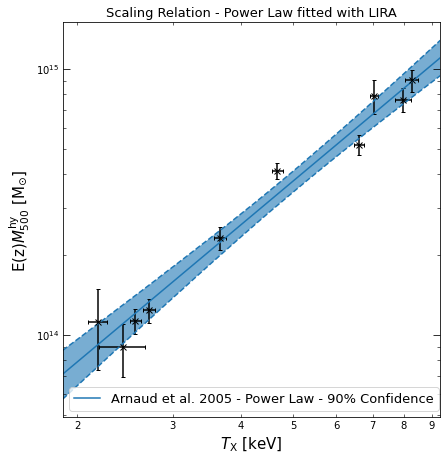

In [6]:
arnaud_m500_Tx.view(figsize=(6.5, 6.5))

In [7]:
arnaud_m500_Tx.save('../../outputs/scaling_relations/for_comparison/arnaud_mt.xgarel')

### [Lovisari et al. 2020](https://ui.adsabs.harvard.edu/abs/2020ApJ...892..102L/abstract)

#### Reading in the data

This data was taken from the [VizieR table](https://vizier.u-strasbg.fr/viz-bin/VizieR-3?-source=J/ApJ/892/102&-out.max=50&-out.form=HTML%20Table&-out.add=_r&-out.add=_RAJ,_DEJ&-sort=_r&-oc.form=sexa) that accompanied the paper. Multiple measures of temperature and luminosity are available, with and without core excision; I believe that the global kT measurements are taken within $R_{500}$, and the core-excised are within $0.15-1R_{500}$.

In [8]:
lovisari_data = pd.read_csv('../../sample_files/for_sr_comp/lovisari2020.csv')
lovisari_data.head(5)

,PLCKESZ,z,M500,E_M500,e_M500,Mg500,E_Mg500,e_Mg500,kT,E_kT,...,e_Lbol,Lbolexc,E_Lbolexc,e_Lbolexc,NT,fT,Nsb,fsb,Simbad,NED
0,G000.44-41.83,0.165,5.01,0.55,0.48,6.61,0.36,0.33,5.85,0.32,...,0.78,6.36,0.47,0.47,6,1.00,20,1.21,Simbad,NED
1,G002.74-56.18,0.141,4.96,0.43,0.28,5.63,0.21,0.14,5.36,0.12,...,0.49,6.03,0.23,0.23,10,0.94,49,1.08,Simbad,NED
2,G003.90-59.41,0.151,6.94,0.19,0.19,8.65,0.08,0.08,7.06,0.13,...,0.67,11.62,0.43,0.43,10,0.98,63,1.08,Simbad,NED
3,G006.70-35.54,0.089,2.42,0.04,0.03,4.27,0.05,0.08,4.72,0.08,...,0.25,3.98,0.21,0.21,15,1.14,45,1.18,Simbad,NED
4,G006.78+30.46,0.203,17.56,0.28,0.27,32.00,0.24,0.22,14.37,0.12,...,1.74,60.27,0.84,0.84,19,1.26,171,1.62,Simbad,NED


Creating astropy quantities to fit scaling relations from. Lowercase 'e' indicates a lower uncertainty, uppercase 'E' indicates an upper uncertainty:

In [9]:
lovisari_ez = xcs_cosmo.efunc(lovisari_data['z'].values)
lovisari_m500 = Quantity(lovisari_data[['M500', 'e_M500', 'E_M500']], '10^14Msun').to("Msun")
lovisari_tx = Quantity(lovisari_data[['kT', 'e_kT', 'E_kT']], 'keV')

#### Fitting the Lovisari $M^{\rm{hy}}_{500}$-$T_{\rm{X}}$ relation with LIRA

In [10]:
y_name = r'E(z)$M^{\rm{hy}}_{500}$'
x_name = r'$T_{\rm{X}}$'
lovisari_m500_Tx = scaling_relation_lira(lovisari_m500[:, 0]*lovisari_ez, 
                                         lovisari_m500[:, 1:]*lovisari_ez[..., None], 
                                         lovisari_tx[:, 0], lovisari_tx[:, 1:], mhy_norm, tx_norm, y_name=y_name, 
                                         x_name=x_name)
lovisari_m500_Tx.name = 'Lovisari et al. 2020'
lovisari_m500_Tx.year = 2020
lovisari_m500_Tx.author = 'Lovisari et al.'
lovisari_m500_Tx.doi = '10.3847/1538-4357/ab7997'
lovisari_m500_Tx.model_colour = 'darkgreen'

  |**************************************************| 100%


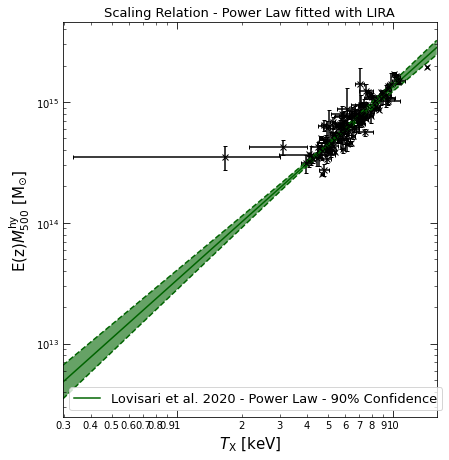

In [11]:
lovisari_m500_Tx.view(figsize=(6.5, 6.5))

In [12]:
lovisari_m500_Tx.save('../../outputs/scaling_relations/for_comparison/lovisari_mt.xgarel')

### Contours of both comparison relations

Removed no burn in
Removed no burn in


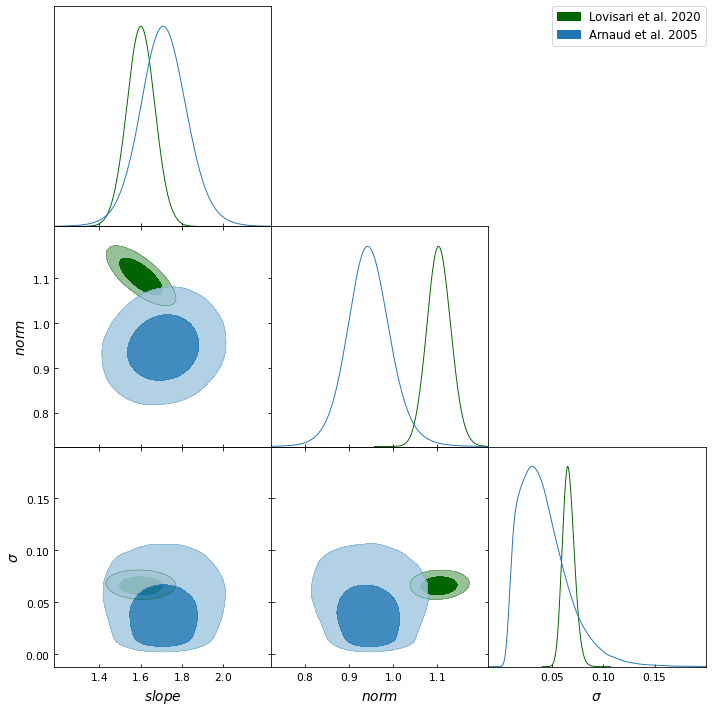

In [13]:
(lovisari_m500_Tx+arnaud_m500_Tx).view_corner()

## Mass-Luminosity

### [Lovisari et al. 2020](https://ui.adsabs.harvard.edu/abs/2020ApJ...892..102L/abstract)

Luminosities are measured both within a 0.1-2.4keV band, and a 0.01-100keV (bolometric) band. There are also measurements within $R_{500}$, and within $0.15-1R_{500}$ (core-excised).

We fit relations for every type of luminosity measured by Lovisari et al.

#### Defining astropy quantities for fitting

In [14]:
lovisari_lx = Quantity(lovisari_data[['LX', 'e_LX', 'E_LX']]*1e+44, 'erg/s')
lovisari_lxce = Quantity(lovisari_data[['LXexc', 'e_LXexc', 'E_LXexc']]*1e+44, 'erg/s')

lovisari_lxbol = Quantity(lovisari_data[['Lbol', 'e_Lbol', 'E_Lbol']]*1e+44, 'erg/s')
lovisari_lxbolce = Quantity(lovisari_data[['Lbolexc', 'e_Lbolexc', 'E_Lbolexc']]*1e+44, 'erg/s')

#### Fitting the Lovisari $M^{\rm{hy}}_{500}$-$L^{0.1-2.4\rm{keV}}_{\rm{X, 500}}$ relation with LIRA

In [15]:
y_name = r'E(z)$M^{\rm{hy}}_{500}$'
x_name = r'$L^{0.1-2.4\rm{keV}}_{\rm{X, 500}}$'
lovisari_m500_Lx = scaling_relation_lira(lovisari_m500[:, 0]*lovisari_ez, 
                                         lovisari_m500[:, 1:]*lovisari_ez[..., None], 
                                           lovisari_lx[:, 0], lovisari_lx[:, 1:], mhy_norm, lx_norm, 
                                           y_name=y_name, x_name=x_name)
lovisari_m500_Lx.name = 'Lovisari et al. 2020'
lovisari_m500_Lx.year = 2020
lovisari_m500_Lx.author = 'Lovisari et al.'
lovisari_m500_Lx.doi = '10.3847/1538-4357/ab7997'
lovisari_m500_Lx.model_colour = 'teal'

  |**************************************************| 100%


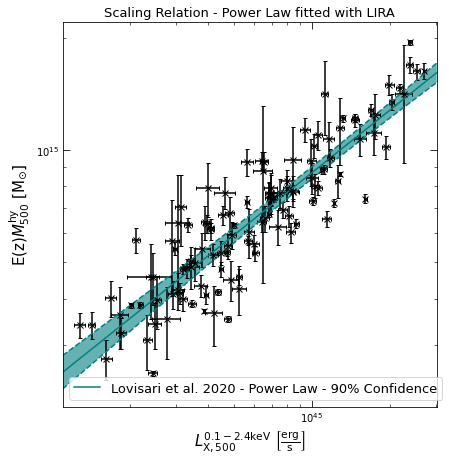

In [16]:
lovisari_m500_Lx.view(figsize=(6.5, 6.5))

In [17]:
lovisari_m500_Lx.save('../../outputs/scaling_relations/for_comparison/lovisari_ml.xgarel')

#### Fitting the Lovisari $M^{\rm{hy}}_{500}$-$L^{0.1-2.4\rm{keV}}_{\rm{X, 500ce}}$ relation with LIRA

In [18]:
y_name = r'E(z)$M^{\rm{hy}}_{500}$'
x_name = r'$L^{0.1-2.4\rm{keV}}_{\rm{X, 500ce}}$'
lovisari_m500_Lxce = scaling_relation_lira(lovisari_m500[:, 0]*lovisari_ez, 
                                           lovisari_m500[:, 1:]*lovisari_ez[..., None], 
                                           lovisari_lxce[:, 0], lovisari_lxce[:, 1:], mhy_norm, lx_norm, 
                                           y_name=y_name, x_name=x_name)
lovisari_m500_Lxce.name = 'Lovisari et al. 2020'
lovisari_m500_Lxce.year = 2020
lovisari_m500_Lxce.author = 'Lovisari et al.'
lovisari_m500_Lxce.doi = '10.3847/1538-4357/ab7997'
lovisari_m500_Lxce.model_colour = 'lightsteelblue'

  |**************************************************| 100%


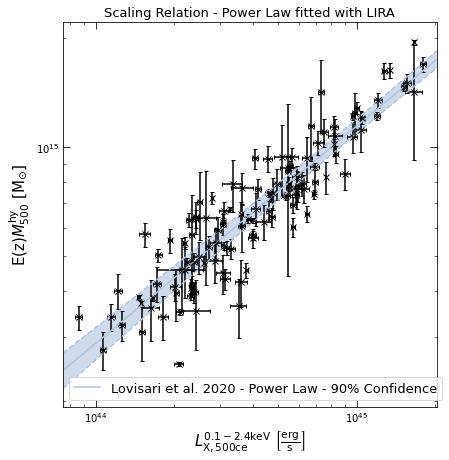

In [19]:
lovisari_m500_Lxce.view(figsize=(6.5, 6.5))

In [20]:
lovisari_m500_Lxce.save('../../outputs/scaling_relations/for_comparison/lovisari_mlce.xgarel')

#### Fitting the Lovisari $M^{\rm{hy}}_{500}$-$L^{\rm{bol}}_{\rm{X, 500}}$ relation with LIRA

In [21]:
y_name = r'E(z)$M^{\rm{hy}}_{500}$'
x_name = r'$L^{0.1-2.4\rm{keV}}_{\rm{X, 500}}$'
lovisari_m500_Lbol = scaling_relation_lira(lovisari_m500[:, 0]*lovisari_ez, 
                                           lovisari_m500[:, 1:]*lovisari_ez[..., None], 
                                           lovisari_lxbol[:, 0], lovisari_lxbol[:, 1:], mhy_norm, lx_norm, 
                                           y_name=y_name, x_name=x_name)
lovisari_m500_Lbol.name = 'Lovisari et al. 2020'
lovisari_m500_Lbol.year = 2020
lovisari_m500_Lbol.author = 'Lovisari et al.'
lovisari_m500_Lbol.doi = '10.3847/1538-4357/ab7997'
lovisari_m500_Lbol.model_colour = 'olive'

  |**************************************************| 100%


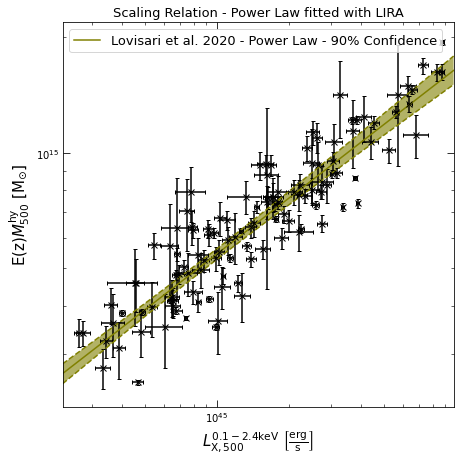

In [22]:
lovisari_m500_Lbol.view(figsize=(6.5, 6.5))

In [23]:
lovisari_m500_Lbol.save('../../outputs/scaling_relations/for_comparison/lovisari_mlbol.xgarel')

#### Fitting the Lovisari $M^{\rm{hy}}_{500}$-$L^{\rm{bol}}_{\rm{X, 500ce}}$ relation with LIRA

In [24]:
y_name = r'E(z)$M^{\rm{hy}}_{500}$'
x_name = r'$L^{0.1-2.4\rm{keV}}_{\rm{X, 500ce}}$'
lovisari_m500_Lbolce = scaling_relation_lira(lovisari_m500[:, 0]*lovisari_ez, 
                                             lovisari_m500[:, 1:]*lovisari_ez[..., None], 
                                             lovisari_lxbolce[:, 0], lovisari_lxbolce[:, 1:], mhy_norm, lx_norm, 
                                             y_name=y_name, x_name=x_name)
lovisari_m500_Lbolce.name = 'Lovisari et al. 2020'
lovisari_m500_Lbolce.year = 2020
lovisari_m500_Lbolce.author = 'Lovisari et al.'
lovisari_m500_Lbolce.doi = '10.3847/1538-4357/ab7997'
lovisari_m500_Lbolce.model_colour = 'seagreen'

  |**************************************************| 100%


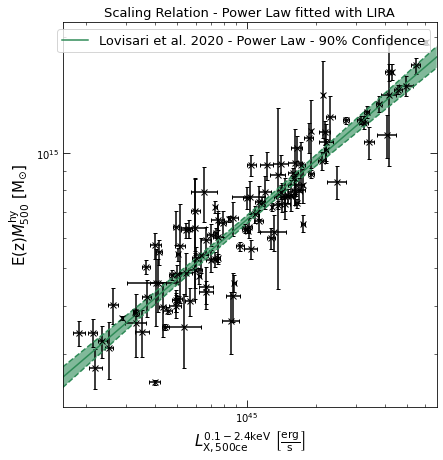

In [25]:
lovisari_m500_Lbolce.view(figsize=(6.5, 6.5))

In [26]:
lovisari_m500_Lbolce.save('../../outputs/scaling_relations/for_comparison/lovisari_mlbolce.xgarel')

###  Contours of the Mass-Luminosity comparison relations

/Users/dt237/code/XGA/xga/products/relation.py:866: UserWarning: Not all of these ScalingRelations have the same x-axis names.
  warn('Not all of these ScalingRelations have the same x-axis names.')


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


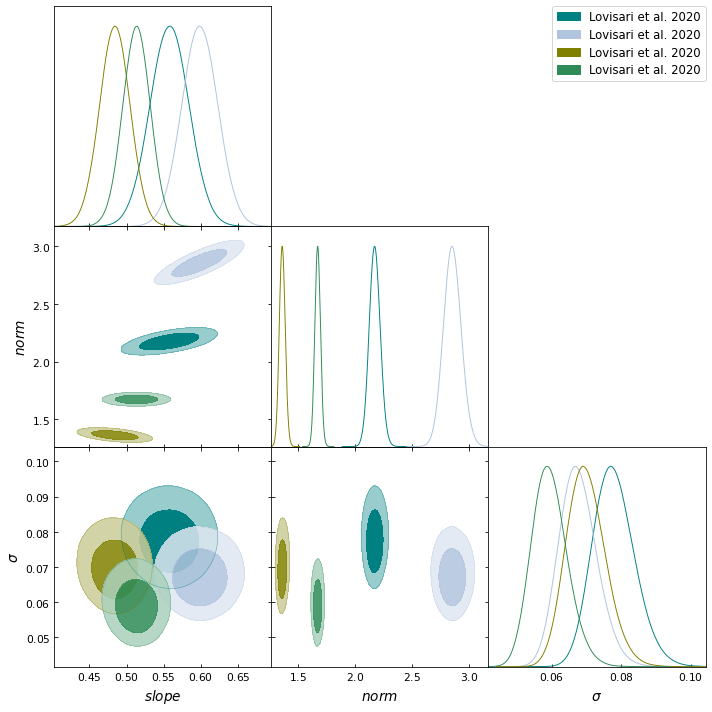

In [27]:
comb_MLx = (lovisari_m500_Lx+lovisari_m500_Lxce+lovisari_m500_Lbol+lovisari_m500_Lbolce)
comb_MLx.view_corner()

## Mass-Richness

### [Andreon et al. 2014](https://www.aanda.org/articles/aa/full_html/2014/08/aa23616-14/aa23616-14.html)

#### Reading in the data

All values are taken from table 1 of Andreon et al. The values (both mass and richness) are measured within 0.5Mpc apertures, so aren't necessarily directly comparable to the scaling relations in our paper.

In [28]:
andreon_data = pd.read_csv('../../sample_files/for_sr_comp/andreon2014.csv')
andreon_data.head(5)

,Name,z,log10n0.5,log10n0.5_err,log10M0.5,log10M0.5_err
0,Abell2104,0.15,1.44,0.08,14.53,0.06
1,Abell1914,0.17,1.72,0.06,14.54,0.05
2,MS0440.5+0204,0.19,1.29,0.09,14.40,0.09
3,Abell520,0.20,1.42,0.08,14.53,0.06
4,Abell2163,0.20,1.49,0.07,14.62,0.06


Again need to put these values into astropy quantities. This requires a little massaging due to the format of the data stored in the table.

In [29]:
andreon_ez = xcs_cosmo.efunc(andreon_data['z'].values)

# Has to be done this way because the errors presented in the paper are logged
andreon_m_vals = 10**andreon_data['log10M0.5']
andreon_m_errs = andreon_data['log10M0.5_err']*np.log(10)*andreon_m_vals
andreon_m = Quantity([andreon_m_vals, andreon_m_errs], 'Msun').T

andreon_rich = Quantity(10**andreon_data[['log10n0.5', 'log10n0.5_err']], '')
andreon_rich_vals = 10**andreon_data['log10n0.5']
andreon_rich_errs = andreon_data['log10n0.5_err']*np.log(10)*andreon_rich_vals
andreon_rich = Quantity([andreon_rich_vals, andreon_rich_errs], '').T

#### Fitting an Andreon $M^{\rm{WL}}_{0.5\rm{Mpc}}$-$\lambda$ relation with LIRA

In [30]:
y_name = r'E(z)$M^{\rm{WL}}_{0.5\rm{Mpc}}$'
x_name = r'$\lambda_{0.5\rm{Mpc}}$'
andreon_m_rich = scaling_relation_lira(andreon_m[:, 0]*andreon_ez, andreon_m[:, 1]*andreon_ez, andreon_rich[:, 0], 
                                       andreon_rich[:, 1],  mhy_norm, rich_norm, y_name=y_name, x_name=x_name)
andreon_m_rich.name = 'Andreon et al. 2014'
andreon_m_rich.year = 2014
andreon_m_rich.author = 'Andreon et al.'
andreon_m_rich.doi = '10.1051/0004-6361/201423616'
andreon_m_rich.model_colour = 'maroon'

  |**************************************************| 100%


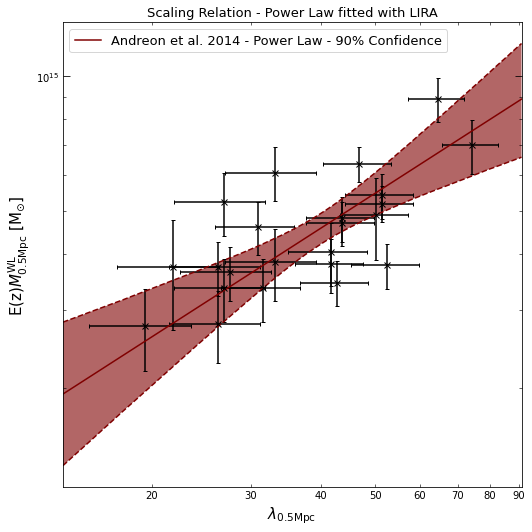

In [31]:
andreon_m_rich.view(figsize=(7.5, 7.5))

In [32]:
andreon_m_rich.save('../../outputs/scaling_relations/for_comparison/andreon_mr.xgarel')

### [Kiiveri et al. 2021](https://ui.adsabs.harvard.edu/abs/2021MNRAS.502.1494K/abstract)

#### Reading in the data

All data are taken from table one of the Kiiveri et al. 2021 work. Many of the values are irrelevant to the re-fitting, but I decided to leave them in so that I can easily use this sample file later if I want to.

In [33]:
kiiveri_data = pd.read_csv('../../sample_files/for_sr_comp/kiiveri2021.csv')
kiiveri_data.head(5)

,codex_id,spiders_id,ra_opt,dec_opt,ra_xray,dec_xray,filters,spec_z,sdss_rm_z,sdss_rm_richness,sdss_rm_richness_err,cfht_rm_z,cfht_rm_richness,cfht_rm_richness_err,m200,m200_err+,m200_err-,m200_errsys,lx,lx_err
0,16566,1_2639,08:42:31,47:49:19,08:42:28,47:50:03,ugriz,0.382,0.368,108,7,0.383,120,3,14.61,0.20,0.29,0.02,3.1,1.2
1,24865,1_5729,08:22:42,41:27:30,08:22:45,41:28:09,ugriz,0.486,0.477,138,23,0.487,91,3,14.91,0.19,0.27,0.03,4.9,1.7
2,24872,1_5735,08:26:06,40:17:31,08:25:59,40:15:19,ugriz,0.402,0.391,149,10,0.407,116,4,14.76,0.23,0.35,0.02,5.4,1.3
3,24877,1_5740,08:24:27,40:06:19,08:24:40,40:06:53,ugriz,0.592,0.539,63,59,0.593,71,4,15.28,0.18,0.24,0.03,4.9,2.0
4,24981,1_5830,08:56:13,37:56:16,08:56:14,37:55:52,ugriz,0.411,0.411,123,12,0.407,107,3,14.68,0.23,0.34,0.02,7.6,1.9


In [34]:
# Using the SDSSRM redshift and richness because thats what my sample uses, but I can't see this choice 
#  making much of a difference
kiiveri_ez = xcs_cosmo.efunc(kiiveri_data['sdss_rm_z'].values)
kiiveri_rich = Quantity(kiiveri_data[['sdss_rm_richness', 'sdss_rm_richness_err']], '')

# Has to be done this way because the errors presented in the paper are logged
kiiveri_m_vals = 10**kiiveri_data['m200']
kiiveri_mpl_errs = kiiveri_data['m200_err+']*np.log(10)*kiiveri_m_vals
kiiveri_mmi_errs = kiiveri_data['m200_err-']*np.log(10)*kiiveri_m_vals
kiiveri_m = Quantity([kiiveri_m_vals, kiiveri_mmi_errs, kiiveri_mpl_errs], 'Msun').T

#### Fitting an Kiiveri $M^{\rm{WL}}_{200}$-$\lambda$ relation with LIRA

In [35]:
y_name = r'E(z)$M^{\rm{WL}}_{200}$'
x_name = r'$\lambda_{\rm{RM,SDSS}}$'
kiiveri_m_rich = scaling_relation_lira(kiiveri_m[:, 0]*kiiveri_ez, kiiveri_m[:, 1:]*kiiveri_ez[..., None], 
                                       kiiveri_rich[:, 0], kiiveri_rich[:, 1],  mhy_norm, rich_norm, 
                                       y_name=y_name, x_name=x_name)
kiiveri_m_rich.name = 'Kiiveri et al. 2021'
kiiveri_m_rich.year = 2021
kiiveri_m_rich.author = 'Kiiveri et al.'
kiiveri_m_rich.doi = '10.1093/mnras/staa3936'
kiiveri_m_rich.model_colour = 'indigo'

  |**************************************************| 100%


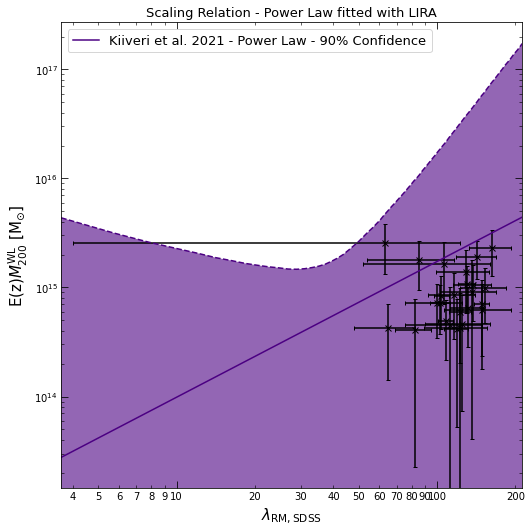

In [36]:
kiiveri_m_rich.view(figsize=(7.5, 7.5))

In [37]:
kiiveri_m_rich.save('../../outputs/scaling_relations/for_comparison/kiiveri_mr.xgarel')

###  Contours of the Mass-Richness comparison relations